# Final project

## Import tools

In [1]:
# package import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Load datasets

In [2]:
df_athletes = pd.read_csv('data/athletes.csv')
df_athletes = df_athletes.head(50000)
df_athletes.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df_a = df_athletes.copy()

In [4]:
# this is different in our datasets so we change it for future use
df_athletes.loc[df_athletes.NOC == 'NED', 'NOC'] = 'NER'

In [5]:
df_countries = pd.read_csv('data/countries.csv')
df_countries_or = df_countries.copy()
clust_countries=df_countries.copy()
df_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
df_GDP = pd.read_csv('data/GDP.csv')
df_GDP_or = df_GDP.copy()
ayx8=df_GDP.copy()
df_GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602596,24985.993281,24713.698045,25025.099563,25533.569780,25796.380251,25239.600411,25630.266492,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,543.303042,591.162346,641.872034,637.165044,613.856333,578.466353,547.228110,556.302139,520.896603,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198,5253.630064,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,39736.354063,41100.729938,38392.943901,40626.751632,42300.334128,36039.653496,37224.108916,39134.393371,42029.762737,NaN


## Manage NaN values and adapt it for analysis

#### Athletes dataset

In [7]:
df_athletes = df_athletes.drop(columns=["Name","ID","Games","Event"])
df_athletes.drop( df_athletes[ df_athletes['Year'] < 1960].index , inplace=True) # the data we are droping because of the countries dataset

In [8]:
df_athletes.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN
4,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,NaN
5,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,NaN
6,F,25.0,185.0,82.0,Netherlands,NER,1992,Winter,Albertville,Speed Skating,NaN


In [9]:
clust_a=df_athletes.copy()
df_athletes["Medal"]=df_athletes.Medal.map({"Gold":3, "Silver":2,"Bronze":1})
df_athletes=df_athletes.fillna(0)
df_athletes.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,0.0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,0.0
4,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,0.0
5,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,0.0
6,F,25.0,185.0,82.0,Netherlands,NER,1992,Winter,Albertville,Speed Skating,0.0


In [10]:
df_a = df_athletes.copy()

##### 0 = No medals won
##### 1 = Bronze medal won
##### 2 = Silver medal won
##### 3 = Golden medal won


In [11]:
df_athletes=df_athletes.sort_values(by='Team') # Put it in alphabetical order to see clearer
df_athletes.head(50)

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
49455,M,22.0,170.0,70.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0
48073,M,0.0,0.0,0.0,Afghanistan,AFG,1988,Summer,Seoul,Wrestling,0.0
11629,M,27.0,168.0,64.0,Afghanistan,AFG,2012,Summer,London,Athletics,0.0
11628,M,23.0,168.0,64.0,Afghanistan,AFG,2008,Summer,Beijing,Athletics,0.0
11627,M,19.0,168.0,64.0,Afghanistan,AFG,2004,Summer,Athina,Athletics,0.0
12959,M,30.0,181.0,99.0,Afghanistan,AFG,2016,Summer,Rio de Janeiro,Judo,0.0
49456,M,23.0,180.0,87.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0
49457,M,27.0,180.0,87.0,Afghanistan,AFG,1972,Summer,Munich,Wrestling,0.0
3129,M,17.0,156.0,48.0,Afghanistan,AFG,1980,Summer,Moskva,Wrestling,0.0
12534,M,24.0,186.0,68.0,Afghanistan,AFG,2008,Summer,Beijing,Taekwondo,0.0


In [12]:
#Check for NaN values
df_athletes.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Medal     0
dtype: int64

There are no longer NaN values, we can continue

In [13]:
#df_summer = df_athletes[df_athletes['Season']=='Summer']
#df_summer.head()

In [14]:
#df_winter = df_athletes[df_athletes['Season']=='Winter']
#df_winter.head()

#### Countries dataset

In [15]:
display(df_countries.isna().sum(),df_countries.count())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Country                               227
Region                                227
Population                            227
Area (sq. mi.)                        227
Pop. Density (per sq. mi.)            227
Coastline (coast/area ratio)          227
Net migration                         224
Infant mortality (per 1000 births)    224
GDP ($ per capita)                    226
Literacy (%)                          209
Phones (per 1000)                     223
Arable (%)                            225
Crops (%)                             225
Other (%)                             225
Climate                               205
Birthrate                             224
Deathrate                             223
Agriculture                           212
Industry                              211
Service                               212
dtype: int64

##### 22<<<227 so we might just drop those Na values

In [16]:
df_countries=df_countries.dropna()

In [17]:
df_countries.isna().sum().sum()
clust=df_countries

No Na values in the dataset. We can continue

#### GDP dataset

In [18]:
#GDP per capita in US $ during the years

In [19]:
df_GDP=df_GDP.drop(columns=["Country Name","Indicator Name","Indicator Code","2018","2019"]) # the last games were in 2016 so we don't need it

In [20]:
df_GDP.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27084.703690,24630.453714,23512.602596,24985.993281,24713.698045,25025.099563,25533.569780,25796.380251,25239.600411,25630.266492
1,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,...,364.660465,438.076034,543.303042,591.162346,641.872034,637.165044,613.856333,578.466353,547.228110,556.302139
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539925,4114.134899,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.089273,43338.866758,39736.354063,41100.729938,38392.943901,40626.751632,42300.334128,36039.653496,37224.108916,39134.393371


In [21]:
df_GDP.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,133.000000,134.000000,136.000000,136.000000,136.000000,146.000000,147.000000,150.000000,154.000000,154.000000,...,251.000000,251.000000,251.000000,252.000000,251.000000,252.000000,251.000000,250.000000,250.000000,246.000000
mean,477.090548,510.997180,537.759283,570.571590,620.118759,687.168945,730.812250,747.106490,766.201365,828.090061,...,15391.724830,13707.443017,14423.626372,15903.921344,15822.664863,16354.589444,16356.195139,14707.131596,14747.116816,14515.124497
std,597.614845,642.387548,674.781661,714.643153,782.415979,874.030595,940.758849,971.350324,1002.331545,1076.088550,...,24146.891838,21083.697615,21710.830053,23961.297976,23150.370578,24726.589825,25092.278876,22369.580670,22472.843662,20608.291936
min,40.537115,40.689390,34.790581,40.752237,41.083814,45.989354,37.488783,46.642770,48.784045,51.794609,...,198.352901,212.136880,234.235647,249.577979,252.358980,256.976003,248.844951,293.465423,282.149682,293.009062
25%,107.949993,109.211954,114.955692,123.204376,124.980086,141.029619,145.767969,157.983788,159.262062,161.937705,...,1470.043561,1357.187492,1575.699381,1738.219933,1873.610010,1957.578334,2035.213733,2009.418262,2050.138368,2006.922358
50%,231.025649,217.409205,232.156045,252.392332,259.622516,273.655226,277.233872,278.460057,291.141585,305.373736,...,5090.932345,4714.702495,5324.617040,5968.327288,6528.972218,6792.886617,6600.056650,6036.798975,5813.802359,6170.481787
75%,489.351689,561.473554,634.966539,666.844461,752.171293,854.120036,882.906899,875.547972,805.809962,860.595621,...,18372.453584,15860.284016,16328.315060,18398.905381,18291.925068,19283.183735,18999.005287,16666.300061,16998.588687,16409.835459
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4443.405272,4571.181955,4336.426587,4695.923390,5032.144743,...,185721.794154,154762.199427,150585.448911,168785.940809,157515.899069,177593.351895,189170.895671,167290.939984,169904.182096,166726.051926


In [22]:
# we delete the countries that didn't have any data
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'VGB'].index)
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'GIB'].index)
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'INX'].index)
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'MAF'].index)
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'PRK'].index)
df_GDP = df_GDP.drop(df_GDP[df_GDP['Country Code'] == 'SXM'].index)

In [23]:
# Getting the min value of the last 4 years for the current year to fill the NaN values

#df_GDP = df_GDP.fillna(method='backfill', inplace = True, axis=1)
df_GDP = df_GDP.T
df_GDP.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,59.7732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,452.078,NaN,NaN,NaN,443.01,232.189,278.814
1961,NaN,59.8609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,464.739,NaN,NaN,NaN,454.962,220.042,280.829
1962,NaN,58.458,NaN,NaN,NaN,NaN,NaN,1155.89,NaN,NaN,...,NaN,NaN,NaN,490.507,NaN,NaN,NaN,473.012,212.578,276.689
1963,NaN,78.7064,NaN,NaN,NaN,NaN,NaN,850.305,NaN,NaN,...,NaN,NaN,NaN,517.419,NaN,NaN,NaN,511.497,213.896,277.48


In [24]:
df_GDP = df_GDP.fillna(method='backfill', axis = 0)
df_GDP = df_GDP.fillna(method='ffill', axis = 0)

In [25]:
df_GDP = df_GDP.T

In [26]:
df_GDP.head(5)

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,27084.7,24630.5,23512.6,24986,24713.7,25025.1,25533.6,25796.4,25239.6,25630.3
1,AFG,59.7732,59.8609,58.458,78.7064,82.0952,101.108,137.594,160.899,129.108,...,364.66,438.076,543.303,591.162,641.872,637.165,613.856,578.466,547.228,556.302
2,AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,4080.94,3122.78,3587.88,4615.47,5100.1,5254.88,5408.41,4166.98,3506.07,4095.81
3,ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,4370.54,4114.13,4094.36,4437.18,4247.61,4413.08,4578.67,3952.83,4124.11,4532.89
4,AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,47785.1,43338.9,39736.4,41100.7,38392.9,40626.8,42300.3,36039.7,37224.1,39134.4


In [27]:
df_GDP.describe()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,258,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
unique,258,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,257.000000,256.000000,256.000000
top,GTM,131.654994,85.945754,89.792026,98.841369,110.766826,163.896432,95.665013,102.982336,173.469143,...,959.480313,1357.618445,1576.176004,1367.338787,1364.441602,1844.577249,1885.558172,1541.835813,1648.678479,1599.336187
freq,1,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [28]:
df_GDP_4years = df_GDP

In [29]:
df_GDP_4years.set_index('Country Code', inplace=True)
df_GDP_4years.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,27084.7,24630.5,23512.6,24986,24713.7,25025.1,25533.6,25796.4,25239.6,25630.3
AFG,59.7732,59.8609,58.458,78.7064,82.0952,101.108,137.594,160.899,129.108,129.33,...,364.66,438.076,543.303,591.162,641.872,637.165,613.856,578.466,547.228,556.302
AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,4080.94,3122.78,3587.88,4615.47,5100.1,5254.88,5408.41,4166.98,3506.07,4095.81
ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,4370.54,4114.13,4094.36,4437.18,4247.61,4413.08,4578.67,3952.83,4124.11,4532.89
AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,47785.1,43338.9,39736.4,41100.7,38392.9,40626.8,42300.3,36039.7,37224.1,39134.4


In [30]:
i = 1960
a = {}
while i < 2019:
    a[str(i)] = [str(i-1), str(i-2), str(i-3), str(i-4)]
    i+=1

In [31]:
df_GDP_new = df_GDP_4years

In [32]:
df_GDP_new.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,27084.7,24630.5,23512.6,24986,24713.7,25025.1,25533.6,25796.4,25239.6,25630.3
AFG,59.7732,59.8609,58.458,78.7064,82.0952,101.108,137.594,160.899,129.108,129.33,...,364.66,438.076,543.303,591.162,641.872,637.165,613.856,578.466,547.228,556.302
AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,4080.94,3122.78,3587.88,4615.47,5100.1,5254.88,5408.41,4166.98,3506.07,4095.81
ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,4370.54,4114.13,4094.36,4437.18,4247.61,4413.08,4578.67,3952.83,4124.11,4532.89
AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,47785.1,43338.9,39736.4,41100.7,38392.9,40626.8,42300.3,36039.7,37224.1,39134.4


In [33]:
for i, country in df_GDP_new.iterrows(): 
    year = 2017
    while(year > 1963):
        #df_GDP_new.iloc[i, str(year)] = float(df_GDP_new[a.get(str(year))].min(axis=1)[df_GDP_new.index == str(i)])
        country[str(year)] = float(df_GDP_new[a.get(str(year))].min(axis=1)[df_GDP_new.index == str(i)])
        year -= 1

In [34]:
df_GDP_new.head(10)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,22570,23300,24045.3,23512.6,23512.6,23512.6,23512.6,24713.7,24713.7,25025.1
AFG,59.7732,59.8609,58.458,78.7064,58.458,58.458,58.458,78.7064,82.0952,101.108,...,211.382,242.031,263.734,359.693,364.66,438.076,543.303,591.162,578.466,547.228
AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,1255.56,1902.42,2599.57,3122,3122.78,3122.78,3587.88,4615.47,4166.98,3506.07
ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,2373.58,2673.79,2972.74,3595.04,4094.36,4094.36,4094.36,4247.61,3952.83,3952.83
AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,38503.5,41282,43338.9,39736.4,39736.4,38392.9,38392.9,38392.9,36039.7,36039.7
ARB,224.086,224.086,224.086,224.086,224.086,224.086,224.086,224.086,224.086,224.086,...,3132.33,3762.77,4356.15,4959.92,5182.36,5182.36,5945.68,6889.09,6459.11,6202.89
ARE,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,...,36333.2,39365.3,32024.2,32024.2,32024.2,32024.2,33893.3,39194.7,38663.4,38141.8
ARG,1155.89,1155.89,1155.89,850.305,850.305,850.305,850.305,850.305,1062.54,1062.54,...,4277.72,5109.85,5919.01,7245.45,8225.14,8225.14,10386,12334.8,12334.8,12334.8
ARM,637.855,637.855,637.855,637.855,637.855,637.855,637.855,637.855,637.855,637.855,...,1191.92,1643.75,2158.14,2994.34,2994.34,2994.34,3218.37,3525.8,3607.3,3591.83


In [35]:
df_ath_gdp = df_athletes.copy()
df_ath_gdp.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
49455,M,22.0,170.0,70.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0
48073,M,0.0,0.0,0.0,Afghanistan,AFG,1988,Summer,Seoul,Wrestling,0.0
11629,M,27.0,168.0,64.0,Afghanistan,AFG,2012,Summer,London,Athletics,0.0
11628,M,23.0,168.0,64.0,Afghanistan,AFG,2008,Summer,Beijing,Athletics,0.0
11627,M,19.0,168.0,64.0,Afghanistan,AFG,2004,Summer,Athina,Athletics,0.0


In [36]:
df_ath_gdp['GDP'] = np.nan
df_ath_gdp.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,GDP
49455,M,22.0,170.0,70.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0,NaN
48073,M,0.0,0.0,0.0,Afghanistan,AFG,1988,Summer,Seoul,Wrestling,0.0,NaN
11629,M,27.0,168.0,64.0,Afghanistan,AFG,2012,Summer,London,Athletics,0.0,NaN
11628,M,23.0,168.0,64.0,Afghanistan,AFG,2008,Summer,Beijing,Athletics,0.0,NaN
11627,M,19.0,168.0,64.0,Afghanistan,AFG,2004,Summer,Athina,Athletics,0.0,NaN


In [37]:
df_GDP_new = df_GDP_new.reset_index()
df_GDP_new.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,22570,23300,24045.3,23512.6,23512.6,23512.6,23512.6,24713.7,24713.7,25025.1
1,AFG,59.7732,59.8609,58.458,78.7064,58.458,58.458,58.458,78.7064,82.0952,...,211.382,242.031,263.734,359.693,364.66,438.076,543.303,591.162,578.466,547.228
2,AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,1255.56,1902.42,2599.57,3122,3122.78,3122.78,3587.88,4615.47,4166.98,3506.07
3,ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,2373.58,2673.79,2972.74,3595.04,4094.36,4094.36,4094.36,4247.61,3952.83,3952.83
4,AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,38503.5,41282,43338.9,39736.4,39736.4,38392.9,38392.9,38392.9,36039.7,36039.7


In [38]:
df_GDP_new.head(20)

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,22570,23300,24045.3,23512.6,23512.6,23512.6,23512.6,24713.7,24713.7,25025.1
1,AFG,59.7732,59.8609,58.458,78.7064,58.458,58.458,58.458,78.7064,82.0952,...,211.382,242.031,263.734,359.693,364.66,438.076,543.303,591.162,578.466,547.228
2,AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,1255.56,1902.42,2599.57,3122,3122.78,3122.78,3587.88,4615.47,4166.98,3506.07
3,ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,2373.58,2673.79,2972.74,3595.04,4094.36,4094.36,4094.36,4247.61,3952.83,3952.83
4,AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,38503.5,41282,43338.9,39736.4,39736.4,38392.9,38392.9,38392.9,36039.7,36039.7
5,ARB,224.086,224.086,224.086,224.086,224.086,224.086,224.086,224.086,224.086,...,3132.33,3762.77,4356.15,4959.92,5182.36,5182.36,5945.68,6889.09,6459.11,6202.89
6,ARE,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,26847.8,...,36333.2,39365.3,32024.2,32024.2,32024.2,32024.2,33893.3,39194.7,38663.4,38141.8
7,ARG,1155.89,1155.89,1155.89,850.305,850.305,850.305,850.305,850.305,1062.54,...,4277.72,5109.85,5919.01,7245.45,8225.14,8225.14,10386,12334.8,12334.8,12334.8
8,ARM,637.855,637.855,637.855,637.855,637.855,637.855,637.855,637.855,637.855,...,1191.92,1643.75,2158.14,2994.34,2994.34,2994.34,3218.37,3525.8,3607.3,3591.83
9,ASM,8700.07,8700.07,8700.07,8700.07,8700.07,8700.07,8700.07,8700.07,8700.07,...,8391.56,8391.56,8391.56,8909.45,9792.67,10271.2,10271.2,10294.3,11505.4,11505.4


In [39]:
#ic = df_GDP_new[df_GDP_new['Country Code'] == 'ALB'].index
#ia = df_GDP_new.columns.get_loc("1961")
#print("Coordenadas: " + int(ic))
#df_GDP_new.iloc[ic, ia]

In [40]:
# update with GDP of year 
i = 0

for index, row in df_ath_gdp.iterrows():
    found = df_GDP_new[df_GDP_new['Country Code'].str.contains(row['NOC'])]
    if found.empty: 
        index
        #print("empty: " + row['NOC'])
    else:
        ic = df_GDP_new[df_GDP_new['Country Code'] == row['NOC']].index
        ia = df_GDP_new.columns.get_loc(str(row['Year']))
        gdp = float(df_GDP_new.iloc[ic, ia])
        #print("country: " + row['NOC'] + " year:" + str(row['Year']) + " gdp: " + str(gdp))
        df_ath_gdp.loc[index, 'GDP'] = gdp

df_ath_gdp.head(50)

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,GDP
49455,M,22.0,170.0,70.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0,82.095231
48073,M,0.0,0.0,0.0,Afghanistan,AFG,1988,Summer,Seoul,Wrestling,0.0,179.426494
11629,M,27.0,168.0,64.0,Afghanistan,AFG,2012,Summer,London,Athletics,0.0,364.660465
11628,M,23.0,168.0,64.0,Afghanistan,AFG,2008,Summer,Beijing,Athletics,0.0,211.381970
11627,M,19.0,168.0,64.0,Afghanistan,AFG,2004,Summer,Athina,Athletics,0.0,179.426494
12959,M,30.0,181.0,99.0,Afghanistan,AFG,2016,Summer,Rio de Janeiro,Judo,0.0,578.466353
49456,M,23.0,180.0,87.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,0.0,82.095231
49457,M,27.0,180.0,87.0,Afghanistan,AFG,1972,Summer,Munich,Wrestling,0.0,129.108323
3129,M,17.0,156.0,48.0,Afghanistan,AFG,1980,Summer,Moskva,Wrestling,0.0,197.445508
12534,M,24.0,186.0,68.0,Afghanistan,AFG,2008,Summer,Beijing,Taekwondo,0.0,211.381970


In [41]:
df_ath_gdp=df_ath_gdp.dropna()

In [42]:
df_ath_gdp[df_ath_gdp['Medal'] > 0]

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,GDP
44174,M,25.0,197.0,90.0,Argentina,ARG,1988,Summer,Seoul,Volleyball,1.0,2659.708600
44176,M,25.0,165.0,64.0,Argentina,ARG,2000,Summer,Sydney,Sailing,1.0,7721.354543
9685,F,26.0,167.0,58.0,Argentina,ARG,2004,Summer,Athina,Hockey,1.0,2593.404150
47694,M,23.0,170.0,70.0,Argentina,ARG,2004,Summer,Athina,Football,3.0,2593.404150
15072,F,28.0,171.0,58.0,Argentina,ARG,2012,Summer,London,Hockey,2.0,8225.137176
15071,F,24.0,171.0,58.0,Argentina,ARG,2008,Summer,Beijing,Hockey,1.0,4277.721351
37204,M,22.0,184.0,81.0,Argentina,ARG,1996,Summer,Atlanta,Football,2.0,6823.537616
37202,F,22.0,163.0,58.0,Argentina,ARG,2012,Summer,London,Hockey,2.0,8225.137176
9684,F,22.0,167.0,58.0,Argentina,ARG,2000,Summer,Sydney,Hockey,2.0,7721.354543
15729,M,23.0,176.0,74.0,Argentina,ARG,1996,Summer,Atlanta,Football,2.0,6823.537616


## Linear Regression

We are going to check if there is a relationship between the GDP of your country and the change of getting a medal

In [43]:
# print the shape of the DataFrame
df_linear = df_ath_gdp.copy()
#pd.options.mode.chained_assignment = None  # default='warn'
df_linear.head()
df_linear.shape

(28817, 12)

In [44]:
year_team_gdp = df_linear.loc[:, ['Year', 'NOC', 'Medal']]
year_team_gdp.shape

(28817, 3)

In [45]:
year_team_gdp.head()

,Year,NOC,Medal
49455,1968,AFG,0.0
48073,1988,AFG,0.0
11629,2012,AFG,0.0
11628,2008,AFG,0.0
11627,2004,AFG,0.0


In [46]:
year_team_gdp['Medal_Won?'] = year_team_gdp.Medal.map({2:1, 3:1, 1:1, 0:0})

In [47]:
tally = year_team_gdp.sort_values('Medal_Won?',ascending = False)

In [48]:
tally.head()

,Year,NOC,Medal,Medal_Won?
33485,1972,ITA,1.0,1
49752,1964,GBR,3.0,1
19895,2002,SWE,1.0,1
44845,1984,NER,1.0,1
7042,1992,SWE,1.0,1


In [49]:
tally = tally.drop(columns = 'Medal')

In [50]:
tally.head()

,Year,NOC,Medal_Won?
33485,1972,ITA,1
49752,1964,GBR,1
19895,2002,SWE,1
44845,1984,NER,1
7042,1992,SWE,1


In [51]:
medal_tally = tally.groupby(['NOC','Year'])['Medal_Won?'].agg('sum').reset_index()
medal_tally = medal_tally.sort_values('NOC',ascending = True)
medal_tally['GDP'] = np.nan
medal_tally.head()

,NOC,Year,Medal_Won?,GDP
0,AFG,1964,0,NaN
1,AFG,1968,0,NaN
2,AFG,1972,0,NaN
3,AFG,1980,0,NaN
4,AFG,1988,0,NaN


In [52]:
for index, row in medal_tally.iterrows():
    found = df_GDP_new[df_GDP_new['Country Code'].str.contains(row['NOC'])]
    if found.empty: 
        index
        #print("empty: " + row['NOC'])
    else:
        ic = df_GDP_new[df_GDP_new['Country Code'] == row['NOC']].index
        ia = df_GDP_new.columns.get_loc(str(row['Year']))
        gdp = float(df_GDP_new.iloc[ic, ia])
        #print("country: " + row['NOC'] + " year:" + str(row['Year']) + " gdp: " + str(gdp))
        medal_tally.loc[index, 'GDP'] = gdp

medal_tally.head()

,NOC,Year,Medal_Won?,GDP
0,AFG,1964,0,58.458015
1,AFG,1968,0,82.095231
2,AFG,1972,0,129.108323
3,AFG,1980,0,197.445508
4,AFG,1988,0,179.426494


In [53]:
medal_tally = medal_tally.rename(columns={"Medal_Won?": "Medals_Won"})
medal_tally.head()

,NOC,Year,Medals_Won,GDP
0,AFG,1964,0,58.458015
1,AFG,1968,0,82.095231
2,AFG,1972,0,129.108323
3,AFG,1980,0,197.445508
4,AFG,1988,0,179.426494


In [54]:
medal_tally.head()

,NOC,Year,Medals_Won,GDP
0,AFG,1964,0,58.458015
1,AFG,1968,0,82.095231
2,AFG,1972,0,129.108323
3,AFG,1980,0,197.445508
4,AFG,1988,0,179.426494


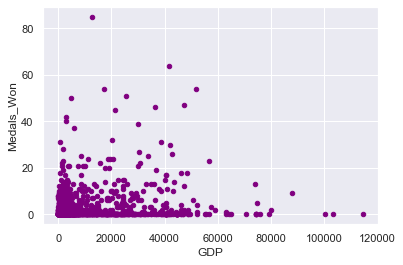

In [55]:
# visualize the relationship between the features and the response using scatterplots
medal_tally.plot(kind='scatter', x='GDP', y='Medals_Won', color='purple')
plt.show()

In [56]:
medal_tally[medal_tally['Medals_Won'] > 80]

,NOC,Year,Medals_Won,GDP
1354,USA,1984,85,12574.791506


In [57]:
df_athletes[df_athletes['Year'] == 1984].head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
857,M,22.0,178.0,67.0,Algeria,ALG,1984,Summer,Los Angeles,Boxing,0.0
2632,M,30.0,172.0,65.0,Algeria,ALG,1984,Summer,Los Angeles,Athletics,0.0
12960,M,22.0,0.0,0.0,Algeria,ALG,1984,Summer,Los Angeles,Athletics,0.0
11670,M,24.0,182.0,85.0,Algeria,ALG,1984,Summer,Los Angeles,Handball,0.0
18667,M,24.0,190.0,80.0,Algeria,ALG,1984,Summer,Los Angeles,Handball,0.0


In [58]:
medal_tally[medal_tally['GDP'] > 100000]

,NOC,Year,Medals_Won,GDP
827,LIE,2010,0,114390.599732
849,LUX,2016,0,100428.367963
848,LUX,2012,0,103198.669313


In [59]:
df_athletes[df_athletes['NOC'] == 'LUX'].head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
44620,M,32.0,178.0,80.0,Luxembourg,LUX,1960,Summer,Roma,Gymnastics,0.0
7564,M,20.0,183.0,70.0,Luxembourg,LUX,1960,Summer,Roma,Cycling,0.0
7563,M,20.0,183.0,70.0,Luxembourg,LUX,1960,Summer,Roma,Cycling,0.0
24225,M,26.0,176.0,66.0,Luxembourg,LUX,1960,Summer,Roma,Athletics,0.0
9056,F,31.0,169.0,55.0,Luxembourg,LUX,2000,Summer,Sydney,Triathlon,0.0


In [60]:
from scipy.stats import ttest_1samp

In [61]:
Medals_Mean = np.mean(medal_tally['Medals_Won'])
Medals_Mean

2.542082738944365

In [62]:
tset, pval = ttest_1samp(medal_tally['Medals_Won'], 2)

In [63]:
print("null hypothesis: there is NO relationship between medals won and gdp")
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are failing to reject null hypothesis")

null hypothesis: there is NO relationship between medals won and gdp
p-values 0.0020971713204599326
we are rejecting null hypothesis


In [64]:
import statsmodels.formula.api as smf

In [65]:
# create a fitted model in one line
lm = smf.ols(formula='Medals_Won ~ GDP', data=medal_tally).fit()

# print the coefficients
lm.params

Intercept    1.828524
GDP          0.000076
dtype: float64

In [66]:
X_new = pd.DataFrame({'GDP': [100000]})
X_new.head()

,GDP
0,100000


In [67]:
lm.predict(X_new)

0    9.477035
dtype: float64

In [68]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'GDP': [medal_tally['GDP'].min(), medal_tally['GDP'].max()]})
X_new.head()

,GDP
0,48.279865
1,114390.599732


In [69]:
preds = lm.predict(X_new)
preds

0     1.832217
1    10.577702
dtype: float64

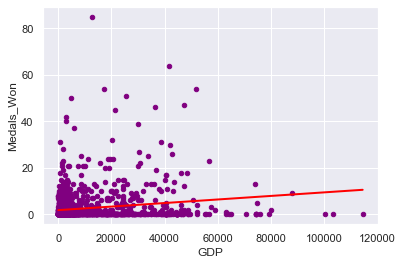

In [70]:
# first, plot the observed data
medal_tally.plot(kind='scatter', x='GDP', y='Medals_Won', color='purple')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

Conclusion: while it is clear that there is some degree of relationship between Medals Won and GDP, this is not enough to produce a highly accurate model. Looking at the countries that are in the extremes of our chart, we are given reasons to believe that a factor that could have a lot of importance is population.

In [71]:
df_a['Medals_Won'] = year_team_gdp.Medal.map({2:1, 3:1, 1:1, 0:0})
df_a.head()
#df_a = df_a.drop_duplicates()
#df_athletes.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,Medals_Won
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,0.0,0.0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,0.0,0.0
4,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,0.0,0.0
5,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,0.0,0.0
6,F,25.0,185.0,82.0,Netherlands,NER,1992,Winter,Albertville,Speed Skating,0.0,0.0


In [72]:
df_GDP.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,6472.5,...,22570,23300,24045.3,23512.6,23512.6,23512.6,23512.6,24713.7,24713.7,25025.1
AFG,59.7732,59.8609,58.458,78.7064,58.458,58.458,58.458,78.7064,82.0952,101.108,...,211.382,242.031,263.734,359.693,364.66,438.076,543.303,591.162,578.466,547.228
AGO,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,710.982,...,1255.56,1902.42,2599.57,3122,3122.78,3122.78,3587.88,4615.47,4166.98,3506.07
ALB,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,639.485,...,2373.58,2673.79,2972.74,3595.04,4094.36,4094.36,4094.36,4247.61,3952.83,3952.83
AND,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,3238.56,...,38503.5,41282,43338.9,39736.4,39736.4,38392.9,38392.9,38392.9,36039.7,36039.7


In [73]:
countries_codes = df_GDP_or.copy()
countries_codes.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602596,24985.993281,24713.698045,25025.099563,25533.569780,25796.380251,25239.600411,25630.266492,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,543.303042,591.162346,641.872034,637.165044,613.856333,578.466353,547.228110,556.302139,520.896603,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198,5253.630064,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,39736.354063,41100.729938,38392.943901,40626.751632,42300.334128,36039.653496,37224.108916,39134.393371,42029.762737,NaN


In [74]:
countries_codes = countries_codes[['Country Name', 'Country Code']]
countries_codes.head()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND


In [75]:
at_countries=pd.merge(df_a, countries_codes,  left_on="NOC", right_on="Country Code")
at_countries = at_countries.drop(columns = ['Country Code', 'Season', 'Sport', 'Team', 'Sex', 'Age', 'Height', 'Weight', 'City'])
at_countries = at_countries[at_countries['Year'] >= 2016]
at_countries = at_countries.drop(columns = 'Year')
at_countries.head()

,NOC,Medal,Medals_Won,Country Name
4,CHN,0.0,0.0,China
5,CHN,0.0,0.0,China
23,CHN,0.0,0.0,China
33,CHN,0.0,0.0,China
36,CHN,0.0,0.0,China


In [76]:
at_countries = at_countries.groupby('Country Name')['Medals_Won'].agg('sum').reset_index()
at_countries = at_countries.sort_values('Medals_Won',ascending = False)
at_countries.head()

,Country Name,Medals_Won
101,United States,54.0
100,United Kingdom,30.0
5,Australia,23.0
46,Italy,21.0
80,Russian Federation,21.0


In [77]:
df_countries_or.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [78]:
countries_pop_gdp = df_countries_or.copy()
countries_pop_gdp = countries_pop_gdp[['Country', 'Population', 'GDP ($ per capita)']]
countries_pop_gdp.head()

,Country,Population,GDP ($ per capita)
0,Afghanistan,31056997,700.0
1,Albania,3581655,4500.0
2,Algeria,32930091,6000.0
3,American Samoa,57794,8000.0
4,Andorra,71201,19000.0


In [79]:
at_countries=pd.merge(at_countries, countries_pop_gdp,  left_on="Country Name", right_on="Country")
at_countries = at_countries.drop(columns = 'Country')
at_countries.head()

,Country Name,Medals_Won,Population,GDP ($ per capita)
0,United States,54.0,298444215,37800.0
1,United Kingdom,30.0,60609153,27700.0
2,Australia,23.0,20264082,29000.0
3,Italy,21.0,58133509,26700.0
4,France,19.0,60876136,27600.0


In [80]:
at_countries = at_countries.rename(columns={"GDP ($ per capita)": "GDP"})

In [81]:
at_countries.head(100)

,Country Name,Medals_Won,Population,GDP
0,United States,54.0,298444215,37800.0
1,United Kingdom,30.0,60609153,27700.0
2,Australia,23.0,20264082,29000.0
3,Italy,21.0,58133509,26700.0
4,France,19.0,60876136,27600.0
5,Canada,14.0,33098932,29800.0
6,Serbia,13.0,9396411,2200.0
7,Spain,13.0,40397842,22000.0
8,Brazil,10.0,188078227,7600.0
9,New Zealand,10.0,4076140,21600.0


In [82]:
at_countries.head()

,Country Name,Medals_Won,Population,GDP
0,United States,54.0,298444215,37800.0
1,United Kingdom,30.0,60609153,27700.0
2,Australia,23.0,20264082,29000.0
3,Italy,21.0,58133509,26700.0
4,France,19.0,60876136,27600.0


In [83]:
import math

# take the log transforms for the variables
at_countries['Log_Population'] = np.log(at_countries['Population'])
at_countries['Log_GDP'] = np.log(at_countries['GDP'])


In [84]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics
# regression model
y, X = dmatrices('Medals_Won ~ GDP + Log_Population', 
                data = at_countries,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Medals_Won   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.00
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           4.85e-08
Time:                        21:17:14   Log-Likelihood:                -269.45
No. Observations:                  82   AIC:                             544.9
Df Residuals:                      79   BIC:                             552.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -24.5674      6.202     -3.961      0.000     -36.912     -12.223
GDP                0.0003   6.34e-05      5.204      0.000       0.000       0.000
Log_Population     1.5263      0.379      4.030      0.000       0.772       2.280
==============================================================================
Omnibus:                       66.249   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.643
Skew:                           2.380   Prob(JB):                    1.57e-105
Kurtosis:                      13.890   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
at_countries = at_countries.drop(columns = ['Log_Population', 'Log_GDP'])

In [86]:
y_predicted = result.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

6.469320609542704

## Merge first two datasets

In [90]:
df_athletes = df_athletes.rename(columns={'Team': 'Country'})
df_athletes=df_athletes.set_index(df_athletes["Country"]).transpose()
df_countries=df_countries.set_index(df_countries["Country"]).transpose()
display(df_athletes.head(),df_countries.head())

Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Sex,M,M,M,M,M,M,M,M,M,M,...,F,M,F,F,M,M,F,M,M,F
Age,22,0,27,23,19,30,23,27,17,24,...,23,26,25,33,25,17,23,29,29,20
Height,170,0,168,168,168,181,180,180,156,186,...,163,177,168,168,170,185,157,180,183,176
Weight,70,0,64,64,64,99,87,87,48,68,...,61,63,55,57,65,106,60,60,70,64
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe


Country,Afghanistan,Albania,Algeria,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Country,Afghanistan,Albania,Algeria,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,LATIN AMER. & CARIB,LATIN AMER. & CARIB,LATIN AMER. & CARIB,C.W. OF IND. STATES,LATIN AMER. & CARIB,OCEANIA,WESTERN EUROPE,...,WESTERN EUROPE,NORTHERN AMERICA,LATIN AMER. & CARIB,C.W. OF IND. STATES,OCEANIA,LATIN AMER. & CARIB,ASIA (EX. NEAR EAST),NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,31056997,3581655,32930091,13477,69108,39921833,2976372,71891,20264082,8192880,...,60609153,298444215,3431932,27307134,208869,25730435,84402966,21456188,11502010,12236805
Area (sq. mi.),647500,28748,2381740,102,443,2766890,29800,193,7686850,83870,...,244820,9631420,176220,447400,12200,912050,329560,527970,752614,390580
Pop. Density (per sq. mi.),"48,0","124,6","13,8","132,1","156,0","14,4","99,9","372,5","2,6","97,7",...,"247,6","31,0","19,5","61,0","17,1","28,2","256,1","40,6","15,3","31,3"


# Clustering

### As Clustering is one type of unsupervised learning, due that we don't given any labels associated with the data, we will try to make a data analisys for comparing how the industry level of each country is related to the number of won medals in Olimpyc Games.

In [91]:
aux1=clust_a
clust_a.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN
4,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,NaN
5,F,21.0,185.0,82.0,Netherlands,NER,1988,Winter,Calgary,Speed Skating,NaN
6,F,25.0,185.0,82.0,Netherlands,NER,1992,Winter,Albertville,Speed Skating,NaN


In [92]:
aux1['Medal_Won'] = aux1.Medal.map({2:1, 3:1, 1:1, np.nan:0})

In [93]:
#aux1.head()
aux2=aux1[aux1.Year == 2016]
aux2[aux2.Medal_Won == 1].head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,Medal_Won


In [94]:
medalC = aux2.groupby(['NOC','Team'])['Medal_Won'].agg('sum').reset_index()
medal_count = medalC.sort_values('Medal_Won',ascending = False)
medal_count.head()

,NOC,Team,Medal_Won
0,AFG,Afghanistan,0.0
129,NIG,Niger,0.0
120,MON,Monaco,0.0
121,MOZ,Mozambique,0.0
122,MRI,Mauritius,0.0


In [95]:
clusgdp=df_GDP_4years[['2016']]
clusgdp.head()

,2016
Country Code,
ABW,24713.7
AFG,578.466
AGO,4166.98
ALB,3952.83
AND,36039.7


In [96]:
clust2=pd.merge(medal_count, clusgdp,  left_on="NOC", right_on="Country Code")

In [97]:
clust2.sort_values('Medal_Won',ascending = False).head()

,NOC,Team,Medal_Won,2016
0,AFG,Afghanistan,0.0,578.466
74,BRA,Brazil-1,0.0,8814
86,BIH,Bosnia and Herzegovina,0.0,4727.28
85,BEN,Benin,0.0,783.963
84,BEL,Belgium,0.0,40441.1


In [98]:
a1=clust[['Country','Industry']].astype(str)
a2=clust2.astype(str)

In [99]:
clustf=pd.merge(a1, a2,  left_on="Country", right_on="Team").drop('Team', axis=1)
clustf.head()

,Country,Industry,NOC,Medal_Won,2016
0,Afghanistan,"0,24",AFG,0.0,578.466352941708
1,Albania,"0,188",ALB,0.0,3952.83078116586
2,Argentina,"0,358",ARG,0.0,12334.7982453893
3,Armenia,"0,343",ARM,0.0,3607.29669672271
4,Australia,"0,262",AUS,0.0,56748.420260660496
